# Damped, driven Duffing oscillator with noise

In [1]:
import fSRK_duff as duff
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from time import time 

## Odeint reference 

In [2]:
def f_duff(r,t): 
    b = 0.15
    A =0.35
    om = 1
    x = r[0]
    y = r[1]
    drdt = np.array([ y, - 2*b*y + x - x**3 + A*np.cos(om*t)])
    return drdt
n = 100
r0 = np.array([0,1])
tvals = np.linspace(0,n*2*np.pi,n*5000)

In [3]:
rvals = odeint(f_duff,r0,tvals)

In [4]:
rvals = np.transpose(rvals)

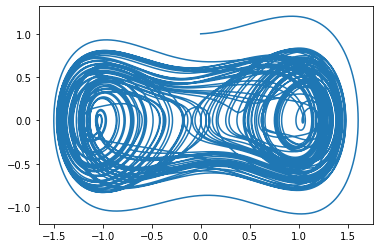

In [5]:
plt.plot(rvals[0],rvals[1])
plt.show()

In [6]:
def o_duffp(r):
    tvals = np.linspace(0, 2*np.pi, 2000)
    rvals = odeint(f_duff,r,tvals)
    return rvals[-1]
    

In [7]:
b = time()
o_plist = [r0]
for i in range(10000):
    o_plist.append(o_duffp(o_plist[-1]))
a = time()

In [8]:
print(a-b)

5.398224353790283


In [9]:
o_plist = np.transpose(o_plist)

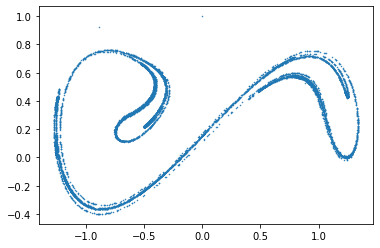

In [10]:
plt.scatter(o_plist[0], o_plist[1], marker = '.', s = 1)
plt.show()

## fSRK version (No Noise)

In [11]:
print(duff.__doc__)

This module 'fSRK_duff' is auto-generated with f2py (version:1.23.0).
Functions:
    f = testduff_drf(t,r,pr,n=shape(r, 0),np=shape(pr, 0))
    g = testduff_dif(t,r,pr,n=shape(r, 0),np=shape(pr, 0))
    f = drift(t,r,p,n=shape(r, 0),np=shape(p, 0))
    g = diffus(t,r,p,n=shape(r, 0),np=shape(p, 0))
    rout,tout = fsrkstp(r0,t0,delt,nstp,p,n=shape(r0, 0),np=shape(p, 0))
    rvals,tvals = fsrk(r0,t0,tf,nout,nps,p,n=shape(r0, 0),np=shape(p, 0))
    normal = normal()
.


In [12]:
r0 = np.array([0,1,0])
p = np.array([0.15,0.35,1,0])
t0 = 0
tf = 100*2*np.pi
nout = 10000
nps = 10

In [13]:
vals = duff.fsrk(r0,t0,tf,nout,nps,p)

In [14]:
rvals = vals[0]
tvals = vals[1]

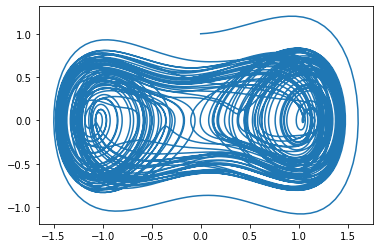

In [15]:
plt.plot(rvals[0],rvals[1])
plt.show()

In [16]:
def f_duffp(r):
    p = np.array([0.15,0.35,1,0])
    t0 = 0
    tf = 2*np.pi
    nout = 2
    nps = 2000
    vals = duff.fsrk(r,t0,tf,nout,nps,p)
    return np.transpose(vals[0])[-1]
    

In [17]:
b = time()
f_plist = [r0]
for i in range(10000):
    f_plist.append(f_duffp(f_plist[-1]))
a = time()

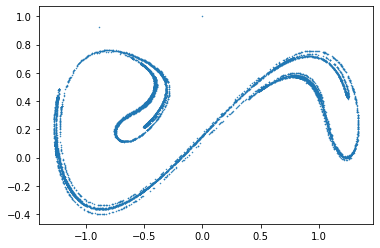

In [18]:
plt.scatter(np.transpose(f_plist)[0], np.transpose(f_plist)[1], marker = '.', s = 1)
plt.show()

The correct attractor is given

## Duffing with white-noise

In [19]:
r0 = np.array([0,1,0])
p = np.array([0.15,0.35,1,0.1])
t0 = 0
tf = 100*2*np.pi
nout = 100000
nps = 1

In [20]:
vals = duff.fsrk(r0,t0,tf,nout,nps,p)
rvals = vals[0]
tvals = vals[1]

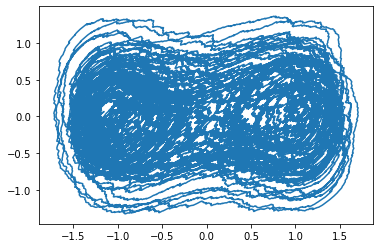

In [21]:
plt.plot(rvals[0],rvals[1])
plt.show()

In [22]:
def f_duffp(r):
    p = np.array([0.15,0.35,1,0.05])
    t0 = 0
    tf = 2*np.pi
    nout = 2
    nps = 2000
    vals = duff.fsrk(r,t0,tf,nout,nps,p)
    return np.transpose(vals[0])[-1]

In [23]:
b = time()
f_plist = [r0]
for i in range(10000):
    f_plist.append(f_duffp(f_plist[-1]))
a = time()

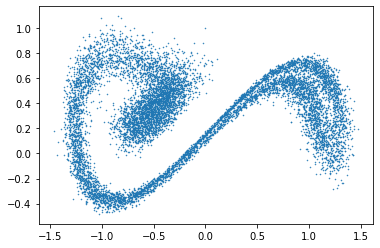

In [24]:
plt.scatter(np.transpose(f_plist)[0], np.transpose(f_plist)[1], marker = '.', s = 1)
plt.show()